In [1]:
#importing the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
seaborn_palettes = list(sns.palettes.SEABORN_PALETTES.keys())
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


In [2]:
# reading the csv file into a pandas DataFrame
df=pd.read_csv(r"C:\Users\joshua\Desktop\netflix_titles.csv")

In [3]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
# Check for size of the dataset
df.shape

(8807, 12)

In [6]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 8807 rows and 12 columns


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
# Check for missing values
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
print('Presence of Missing Values in the dataset')

Presence of Missing Values in the dataset


In [10]:
# Check for duplicates
df.duplicated().any()

False

In [11]:
print('No duplicates in the dataset')

No duplicates in the dataset


In [12]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [13]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [14]:
df['listed_in'].value_counts()

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64

In [15]:
df['release_year'].mode(0)

0    2018
Name: release_year, dtype: int64

### Issues Identified in the Dataset
- Presence of null values
- Incorrect data placement in the rating column
- Incorrect data type for the date_added column

# Data Cleaning Process

### Handling Incorrect data type for the date_added column

Converting the 'date_added' column from object to datetime datatype

In [16]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [17]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

### Handling Incorrect data placement in the rating column
"Move Duration Values from Rating to Duration Column in a DataFrame"

In [18]:
def move_duration_values(df, minute_values):
    """
    Moves specific minute values from the 'rating' column to the 'duration' column 
    in a DataFrame and sets those entries in the 'rating' column to NaN.

    Parameters:
    df (pd.DataFrame): The DataFrame containing 'rating' and 'duration' columns.
    minute_values (list of str): List of duration values (as strings) to move from 
                                 'rating' to 'duration' column.

    Returns:
    pd.DataFrame: The modified DataFrame with specified minute values moved to 
                  'duration' and corresponding 'rating' entries set to NaN.
    """
    # Move the values from 'rating' to 'duration' where they are in the list
    df.loc[df['rating'].isin(minute_values), 'duration'] = df['rating']
    
    # Set the 'rating' column to NaN for these rows
    df.loc[df['rating'].isin(minute_values), 'rating'] = np.nan
    
    return df
# List of values that should be moved from 'rating' to 'duration'
minute_values = ['74 min', '84 min', '66 min']

# Call the function
df = move_duration_values(df, minute_values)  

### Renaming Columns and Dropping irrelevant Columns


In [19]:
## Drop irrelevant column
df.drop('show_id', axis=1, inplace=True)
 

In [20]:
## Renaming column
df.rename(columns={'listed_in': 'genres'}, inplace=True)

In [21]:
df.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


### Checking for unique values of rating and categorising them for better understanding

In [22]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [23]:
def rename_rating_values(df):
    """
    Renames specific values in the 'rating' column to broader categories such as 
    'Kids', 'Teens', 'Adults', and treats 'UR' and 'NR' as NaN.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the 'rating' column with rating values.

    Returns:
    pd.DataFrame: The modified DataFrame with renamed rating values and 'UR'/'NR' as NaN.
    """
    # Mapping of rating values to categories, treating 'UR' and 'NR' as NaN
    rating_map = {
        'G': 'Kids',
        'TV-Y': 'Kids',
        'TV-Y7': 'Kids',
        'TV-Y7-FV': 'Kids',
        'PG': 'Kids',
        'TV-PG': 'Kids',
        'PG-13': 'Teens',
        'TV-14': 'Teens',
        'R': 'Adults',
        'TV-MA': 'Adults',
        'NC-17': 'Adults',
        'UR': np.nan,  # Treat 'UR' as NaN
        'NR': np.nan,  # Treat 'NR' as NaN
    }

    # Apply the mapping to the 'rating' column and leave other NaN as NaN
    df['rating'] = df['rating'].map(rating_map)

    return df
df = rename_rating_values(df)

In [24]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [25]:
df['rating'].unique()

array(['Teens', 'Adults', 'Kids', nan], dtype=object)

### **Handling Null Values**

In [26]:
def summarize_missing_values(df):
    """
    This function summarizes the missing values in a DataFrame by calculating 
    the count and percentage of missing values for each column. It also displays 
    columns with missing values and prints the total missing values along with 
    their percentage in the entire DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame in which missing values are to be analyzed.

    Returns:
    None: The function prints the summary of missing values, columns with missing data,
          and the total missing values count and percentage.
    """
    # Calculate the count of missing values for each column
    missing_count = df.isnull().sum()

    # Calculate the percentage of missing values for each column
    missing_percentage = (df.isnull().mean()) * 100

    # Round the percentage to two decimal place
    missing_percentage=missing_percentage.round(2)

    # Create a DataFrame with the missing count and percentage side by side
    missing_summary = pd.DataFrame({
        'Missing Value Count': missing_count,
        'Percentage%': missing_percentage
    })

    # Sort the missing data summary by the 'Missing Value Count' in descending order
    missing_summary_sorted = missing_summary.sort_values(by='Missing Value Count', ascending=False)

    # Display total number of records (rows) in the DataFrame
    print(f'Total Records Present: {df.shape[0]}')

    # Display columns with missing values, ignoring those with no missing values
    print("\nColumns with missing values:")
    print(missing_summary_sorted[missing_summary_sorted['Missing Value Count'] > 0])

    # Display the total missing values and the percentage of missing data
    total_missing = missing_summary_sorted['Missing Value Count'].sum()
    total_percentage = (total_missing / df.shape[0]) * 100

    print(f'\nTotal Missing Values: {total_missing} ({round(total_percentage, 2)}%)')

summarize_missing_values(df)

Total Records Present: 8807

Columns with missing values:
            Missing Value Count  Percentage%
director                   2634        29.91
country                     831         9.44
cast                        825         9.37
rating                      310         3.52
date_added                   98         1.11

Total Missing Values: 4698 (53.34%)


Impute missing 'date_added' with January 1st of 'release_year'

In [27]:
df['date_added'] = df['date_added'].fillna(pd.to_datetime(df['release_year'].astype(str) + '-01-01'))

Replace missing values in 'cast' and 'director' columns with 'Unknown'

In [28]:
df['cast']=df['cast'].fillna('Unknown')
df['director']=df['director'].fillna('Unknown')

Replace missing values in 'country' and 'rating' columns with their respective modes

In [29]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['rating']=df['rating'].fillna(df['rating'].mode()[0])

In [30]:
summarize_missing_values(df)

Total Records Present: 8807

Columns with missing values:
Empty DataFrame
Columns: [Missing Value Count, Percentage%]
Index: []

Total Missing Values: 0 (0.0%)


In [31]:
df.head(10)

,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,Adults,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,Kids,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,Adults,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,Teens,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,Teens,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


# **Exploratory Data Analysis**

In [32]:
sns.set(style='darkgrid')

### What is the distribution of MOVIE vs TV show types in the dataset?

In [33]:
def analyze_content_type(df, column_name):
    """
    Analyze the distribution of unique values in a specified column by:
    - Calculating the counts and percentages of each unique value.
    - Visualizing the distribution using a count plot.

    Parameters:
    df (DataFrame): The input DataFrame containing the data.
    column_name (str): The name of the column for which unique value counts, percentages, and visualization are performed.

    Returns:
    DataFrame: A DataFrame with two columns: 'Content Type' and 'Percentage(%)', 
               showing the unique values and their respective percentages rounded to the nearest whole number.
    """
    # Get counts of each unique value in the specified column
    type_counts = df[column_name].value_counts()
    
    # Calculate the percentage of each unique value
    type_percentage = (type_counts / len(df)) * 100
    type_percentage = type_percentage.round(0)
    
    # Prepare the results in a DataFrame
    ddf = pd.DataFrame(type_percentage).reset_index()
    ddf.columns = ['Content Type', 'Percentage(%)']

    print(ddf)
    
    # Plot the distribution
    sns.countplot(x=column_name, data=df, palette='viridis')
    plt.title(f'Distribution of {column_name}', fontsize=16, fontweight='bold')
    plt.xlabel('Content Type', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()
    


  Content Type  Percentage(%)
0        Movie           70.0
1      TV Show           30.0


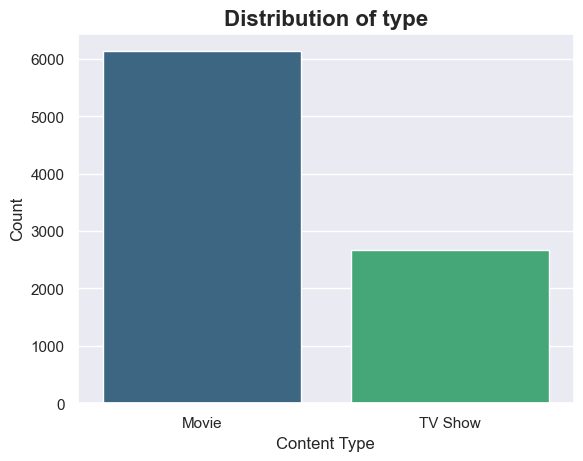

In [34]:
analyze_content_type(df, 'type')

**Key Finding**

- 70% of the contents on Netflix are Movies
- 30% are TV Show
  
*This indicates that Netflix indeed has more movies in its content library than TV shows.*

### Which Are the Top 10 Countries by Unique Netflix Content Distribution?

In [35]:
def plot_content_distribution(df):
    """
    Removes duplicate titles per country, identifies the top 10 countries 
    by unique content count, and plots the content distribution across 
    these countries based on the type of content.

    Parameters:
        df (pandas.DataFrame): The input DataFrame containing at least 
                               the following columns:
                               - 'country': Country of the content
                               - 'title': Title of the content
                               - 'type': Type/category of the content
    
    Returns:
        None: Displays the plot showing the content distribution across 
              the top 10 countries.
    """
    
    # Remove duplicate titles per country
    df_temp = df.drop_duplicates(subset=['country', 'title'])

    # Get the top 10 countries by unique content count
    top_countries = df_temp['country'].value_counts().nlargest(10).index

    # Filter df_temp to only include rows from these top 10 countries
    df_top_countries = df_temp[df_temp['country'].isin(top_countries)]

    # Plotting
    plt.figure(figsize=(17, 8))
    plt.title('Content Distribution Across Top 10 Countries', fontsize=16, fontweight='bold')

    # Countplot with the filtered data
    label = sns.countplot(data=df_top_countries, x='country', hue='type', order=top_countries)

    # Add bar labels to indicate count values
    for container in label.containers:
        label.bar_label(container)

    # Show the plot
    plt.show()


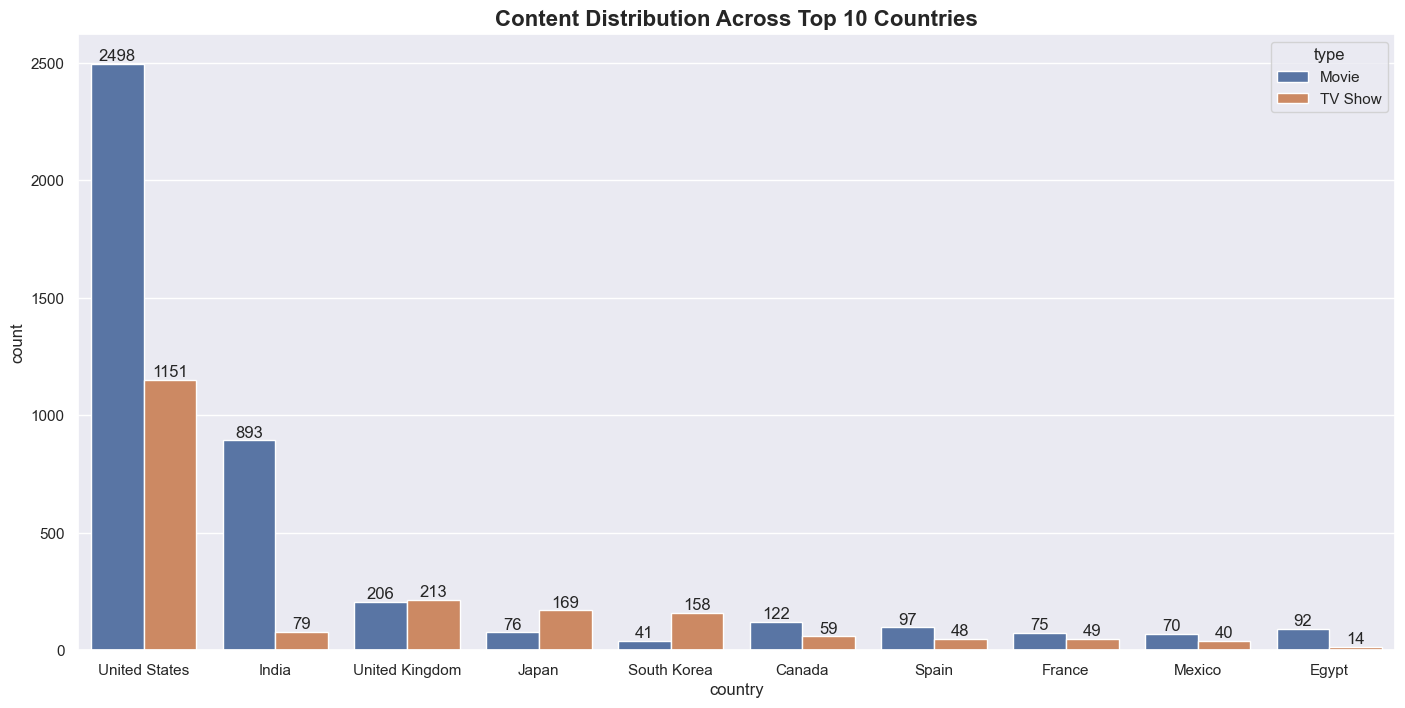

In [36]:
plot_content_distribution(df)

**Key Finding**

- United States has the highest count, with a significant lead in both Movies and TV shows
- India is second, predominantly featuring Movies over TV shows
- The United Kingdom, Japan, and South Korea follow, reach with a balanced mix of Movies and TV shows
- Other Countries (Canada, Spain, France, Mexico, and Egypt) have considerably fewer titles, with movies generally outnumbering TV shows in each.

*Overall, Movies are more Prevalent than Tv shows across these top countries*

### Which Content Rating is Most Common?

In [37]:
def calculate_and_plot_rating_distribution(df):
    """
    Calculates the percentage distribution of unique values in the 'rating' 
    column of the given DataFrame, displays the result, and plots a pie chart 
    showing the distribution.

    Parameters:
        df (pandas.DataFrame): The input DataFrame containing a 'rating' column.

    Returns:
        None
    """
    
    # Get counts of each unique value in the 'rating' column
    rating_counts = df['rating'].value_counts()

    # Calculate the percentage of each rating
    rating_percentage = (rating_counts / len(df)) * 100
    rating_percentage = rating_percentage.round(0)

    # Create a DataFrame with the results
    ddf = pd.DataFrame(rating_percentage).reset_index()
    ddf.columns = ['Rating', 'Percentage(%)']

    # Display the result
    print(ddf)

    # Plot a pie chart for the distribution
    plt.figure(figsize=(8, 6))
    plt.pie(
        rating_counts, 
        labels=rating_counts.index, 
        autopct='%.0f%%', 
        startangle=90, 
        explode=[0.04 if i == 0 else 0.03 for i in range(len(rating_counts))], 
        shadow=True
    )
    plt.title("Distribution of Content's Rating", fontsize=16, fontweight='bold')
    plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
    plt.show()


   Rating  Percentage(%)
0  Adults           49.0
1   Teens           30.0
2    Kids           21.0


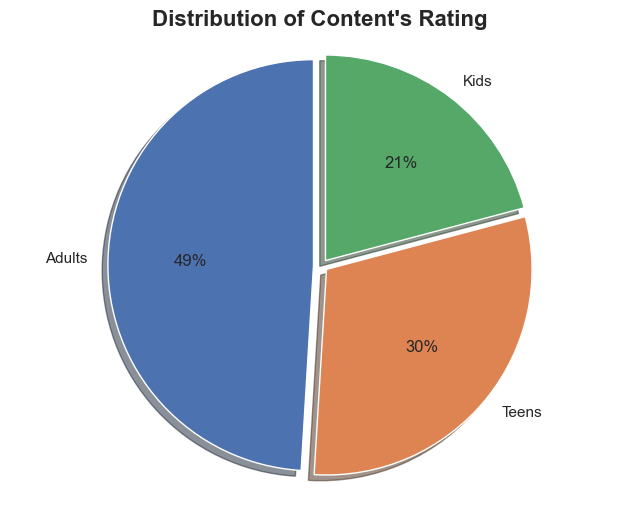

In [38]:
calculate_and_plot_rating_distribution(df)

**Key Findings**

- 49% of the contents is rated for Adults
- 30% is rated for Teens
- 21% is rated for kids

*This indicates that majority of contents is geared towards adults, with a smaller portion directed at teens and kids*

NB: *Adult content rating is most common*

### Which Genres Dominate Netflix's Movie and Tv Catalog?

In [39]:
def plot_genre_distribution_by_type(df):
    """
    Plots the distribution of genres for Movies and TV Shows as normal bar plots.

    The function processes the 'genres' and 'type' columns of the input DataFrame to:
    1. Split and flatten the genres into individual genre counts.
    2. Separate the dataset into Movies and TV Shows.
    3. Count the frequency of each genre for both Movies and TV Shows.
    4. Plot the top 10 genres for Movies and TV Shows in separate subplots using normal bar charts.

    Parameters:
    - df (pd.DataFrame): A DataFrame containing at least the 'genres' and 'type' columns, 
                          where 'genres' is a comma-separated string of genres and 'type' 
                          specifies whether the entry is a 'Movie' or 'TV Show'.

    Returns:
    - None: Displays a plot with two normal bar plots (one for Movies and one for TV Shows).
    """
    
    # Split the genres by commas and flatten the list
    genres = df['genres'].dropna().str.split(', ').explode()

    # Count the frequency of each genre
    genre_counts = genres.value_counts()

    # Separate Movies and TV Shows
    movies = df[df['type'] == 'Movie']
    tv_shows = df[df['type'] == 'TV Show']

    # Extract genres for movies and TV shows separately
    movie_genres = movies['genres'].dropna().str.split(', ').explode()
    tv_show_genres = tv_shows['genres'].dropna().str.split(', ').explode()
    
    # Count the genre frequency for both Movies and TV Shows
    movie_genre_counts = movie_genres.value_counts()
    tv_show_genre_counts = tv_show_genres.value_counts()

    # Plot the results (Bar chart for genres in Movies and TV Shows)
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Plot for Movies (Bar bar chart)
    sns.barplot(x=movie_genre_counts.head(10).index,
                y=movie_genre_counts.head(10).values,
                palette=random.choice(seaborn_palettes),
                ax=axes[0])
    axes[0].set_title('Top 10 Genres in Movies')
    axes[0].set_xlabel('Genre')
    axes[0].set_ylabel('Number of Titles')
    axes[0].tick_params(axis='x', rotation=45)

    # Plot for TV Shows (normal bar chart)
    sns.barplot(x=tv_show_genre_counts.head(10).index,
                y=tv_show_genre_counts.head(10).values,
                palette=random.choice(seaborn_palettes),
                ax=axes[1])
    axes[1].set_title('Top 10 Genres in TV Shows')
    axes[1].set_xlabel('Genre')
    axes[1].set_ylabel('Number of Titles')
    axes[1].tick_params(axis='x', rotation=45)

    # Tight layout for better spacing
    plt.tight_layout()
    plt.show()

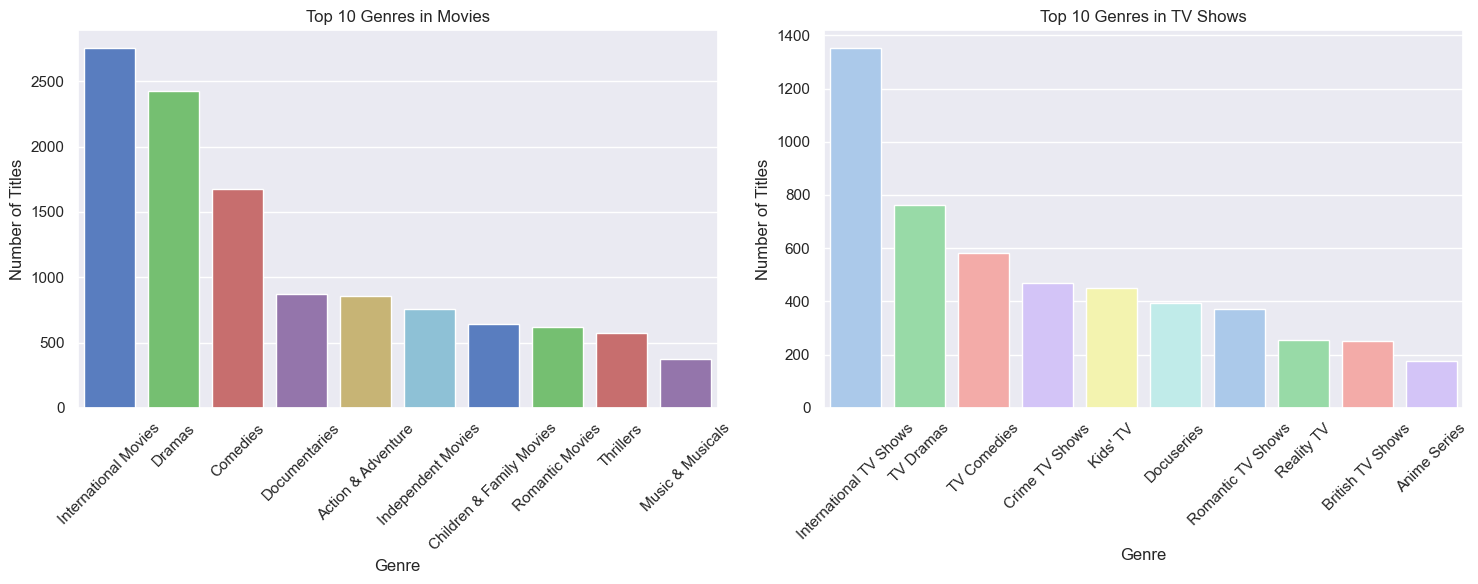

In [40]:
plot_genre_distribution_by_type(df)

**Key Findings**

The Netflix catalog is dominated by International Movies and TV Shows across both categories. For Movies, the top genres are International Movies, Dramas, Comedies, Documentaries, Action & Adventure, Independent Movies, Children & Family Movies Romantic Movies, Thrillers, and Music & Musicals. For TV Shows, the leading genres are International TV Shows, TV Dramas, TV Comedies, Crime TV Shows, Kids' TV, Docuseries, Romantic TV Shows, Reality TV, British TV Shows and Anime Series.

 
*The majority of the content falls under the International genre, followed by Dramas and comedies*.
